# ECS7024 Statistics for Artificial Intelligence and Data Science

# Coursework 2 

## Contents Page

The aim of this report is to identify trends and relationships for the current condition of Texas bridges. The predictors will be analysed through exploratory analysis and regression analysis to accurately identify what predictors influence bridge condition the most and how well they predict the target variable.

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Data Preparation
  * Section 2.1: Deriving the Age variable
  * Section 2.2: Identifying old bridges
  * Section 2.3: Reducing categories
  * Section 2.4: Deriving the Current Conditon (target variable)
3. Section 3: Exploratory Analysis
  * Section 3.1: Continous Variables Relationships
  * Section 3.2: Categorical Variables Relationships
  * Section 3.3: Continuous and Categorical Relationships
  * Section 3.4: Preliminary conclusions
4. Section 4: Regression Modelling
  * Section 4.1: Preparation
  * Section 4.2: Fitting the regression line
  * Section 4.3: The R2 (coefficient of determination) 
  * Section 4.4: Displaying the distribution of residuals (errors).
  * Section 4.5: Comparing the influence of the predictors on the Current condition
  * Section 4.6: Conclusions
  

## Section 1: Introduction

### Section 1.1: Outline

Section 1 is the intro which loads the data. Section 2 we begin data preparation and derive the variables. Section 3 we carry out exploratory analysis to begin analysing relationships between variables. In Section 4, we carry out our regression to get an accurate measure of the relationships between predictor and target variables.

### Section 1.2: Loading the data
The data is loaded from a CSV file. The structure id is used as an index in this dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# The code below declares a catageorical type with categories in a specified order
# This can be used for an ordinal variable
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

# This one is also for an ordinal variable, but with a slightly different set of values
scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges 

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


## Section 2: Data Preparation

in this section we prepare the data for exploratory analysis. We clean the data and condense it to allow it to be interpreted more smoothly. Tasks such as merging columns and removing missing values

### Section 2.1: Deriving the Age variable

We derive the age variable using the current year minus the bridges year it was built. This derives the current age of the bridge. this allows us to analyse the data more accurately

In [3]:
new_bridges = pd.DataFrame()

new_bridges = bridges.loc[:, ('Material','Design','Historic')]

new_bridges = new_bridges.assign(percent_trucks = bridges.loc[:,'Trucks_percent'])
new_bridges = new_bridges.assign(average_use = bridges.loc[:,'AverageDaily'])

Age = 2021 - bridges.loc[:,'Year']

new_bridges.columns = ['Material','Design', 'Historic','Average_Use', 'Percent_Trucks']

new_bridges["Historic"] = new_bridges["Historic"].astype('string')

new_bridges['Age'] = Age

new_bridges

,Material,Design,Historic,Average_Use,Percent_Trucks,Age
Structure_id,,,,,,
000021521-00101,Concrete,Slab,Not historic,0.0,1,16
000021521-00181,Concrete,Slab,Not historic,0.0,1,16
000021521-TMP20,Concrete,Beam,Not historic,0.0,100,9
000021525-00012,Timber,Beam,Not historic,0.0,80,71
000021580-00092,Concrete,Beam,Not historic,4.0,150,17
...,...,...,...,...,...,...
DAPFORHOO000012,Concrete,Beam,Not historic,40.0,300,27
DAPFORHOO000013,Concrete,Beam,Not historic,40.0,300,21
DAPFORHOO000015,Concrete,Beam,Not historic,25.0,1200,25


### Section 2.1: Identifying old bridges

We have added the historic column variable to allow us to see if the historic column associates directly with the age of the bridge. 

As the table below shows, there are multiple bridges under the Age of 10 which are classed as historic. Therefore, we can not use historic as an accurate measure to drop old bridges as we don't know what the dataset defines historic as. It could mean a number of things such as bridges named after a historic figure for example.

Therefore we use a different method to drop the very old bridges as not all historic bridges are old so this is not an accurate measure.

In [4]:
#new_bridges['Historic'].unique()
#new_bridges.loc[:,['Historic','Age']]

# Checks for registered historic bridges
historic_bridge_check = new_bridges.loc[(new_bridges.Historic == 'Register') & (new_bridges.Age < 10)]
historic_bridge_check

,Material,Design,Historic,Average_Use,Percent_Trucks,Age
Structure_id,,,,,,
030120AA0147001,Concrete,Other,Register,0.0,10,5
030390028201124,Concrete,Beam,Register,26.0,1275,3
032440AA0339002,Concrete,Beam,Register,5.0,40,5
041910053401005,Concrete,Beam,Register,1.0,350,5
080770AA0357002,Concrete,Beam,Register,0.0,100,6
232060AA0137003,Concrete,Beam,Register,2.0,50,4


Instead we classify a bridge as old by any bridge which is greater than 115 years old is considered an outlier using the 1.5 * Interquartile range which is a common way to identify outliers. We have also plotted a box plot of the age of bridges to help you further visualise what bridges are considered old. The next step we took was to omit all outliers from the data frame.

IQR score upper range: 114.0 Any bridge age above 114.0 is an outlier


,Material,Design,Historic,Average_Use,Percent_Trucks,Age
Structure_id,,,,,,
000021521-00101,Concrete,Slab,Not historic,0.0,1,16
000021521-00181,Concrete,Slab,Not historic,0.0,1,16
000021521-TMP20,Concrete,Beam,Not historic,0.0,100,9
000021525-00012,Timber,Beam,Not historic,0.0,80,71
000021580-00092,Concrete,Beam,Not historic,4.0,150,17
...,...,...,...,...,...,...
DAPFORHOO000012,Concrete,Beam,Not historic,40.0,300,27
DAPFORHOO000013,Concrete,Beam,Not historic,40.0,300,21
DAPFORHOO000015,Concrete,Beam,Not historic,25.0,1200,25


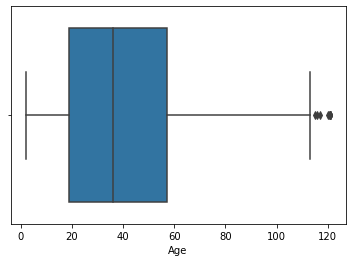

In [5]:
new_bridges.describe()

box = sns.boxplot(x=new_bridges['Age'])

# First quartile (Q1)
Q1 = np.percentile(new_bridges.Age, 25, interpolation = 'midpoint')
  
#Third quartile (Q3)
Q3 = np.percentile(new_bridges.Age, 75, interpolation = 'midpoint')
  
#Interquartile range (IQR)
IQR = Q3 - Q1

#Outlier boundaries
range1 = Q1 - (1.5 * IQR)
range2 = Q3 + (1.5 * IQR)

# range1
print('IQR score upper range:', range2, 'Any bridge age above', range2, 'is an outlier')

# Drops all old bridges. 
new_bridges.drop(new_bridges[new_bridges.Age > range2].index, inplace=True)
new_bridges

### Section 2.3: Reducing categories

We have many categories with not many values in them for material and design. The method we have taken is to find the ones with not many values and add them to other. The tables below show the new values for every column in the data frame. This will now consist of only 3 different classes.

In [6]:
#new_bridges['Material']
#new_bridges['Design']

new_bridges['Material'].value_counts()
new_bridges = new_bridges.replace("Timber", "Other")
new_bridges = new_bridges.replace("Masonry", "Other")

new_bridges['Material'].value_counts()
new_bridges['Design'].value_counts()

def design_replacement(row):
    if (row.Design == "Arch"): return "Other"
    if (row.Design == "Truss"): return "Other"
    if (row.Design == "Frame"): return "Other"
    if (row.Design == "Movable"): return "Other"
    if (row.Design == "Suspension"): return "Other"
    return row.Design
    
new_bridges.Design = new_bridges.apply(design_replacement, axis=1)

print(new_bridges['Material'].value_counts())
print(new_bridges['Design'].value_counts())

Concrete    27126
Steel        6625
Other         526
Name: Material, dtype: int64
Beam     28324
Slab      4339
Other     1614
Name: Design, dtype: int64


### Section 2.4: Deriving the Current Conditon (target variable)

The first step is to create a dict so we can replace the strings of the condition ratings with their number counterparts in order to visualise the data. This allows us to classify each rating and also show the relationship between categorical variable and label on a graph. We assign the columns which will create our current condition label attribute to the existing data frame / table. We need to drop the null values to allow us to derive the current condition properly. Missing values will cause a sum total of NaN which will impact our regression and graph plots later.

In [7]:
categories = set(bridges['Deck_rating'])

condition_rating = {"Failed": 0,"Failing": 1, "Critical" : 2, "Serious" : 3, "Poor": 4, "Fair": 5, 
                     "Satisfactory" : 6, "Good":7, "Very Good":8, "Excellent": 9}

new_bridges = new_bridges.assign(Deck_rating = bridges.loc[:,'Deck_rating'])
new_bridges = new_bridges.assign(Superstr_rating = bridges.loc[:,'Superstr_rating'])
new_bridges = new_bridges.assign(Substr_rating = bridges.loc[:,'Substr_rating'])

new_bridges = new_bridges.replace(condition_rating)

new_bridges.loc[(new_bridges.Deck_rating.isnull()) | (new_bridges.Superstr_rating.isnull())]

,Material,Design,Historic,Average_Use,Percent_Trucks,Age,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,,
010920004518118,Concrete,Beam,Possible,2.0,7520,51,NaN,7.0,7
021200AA0205001,Steel,Beam,Possible,0.0,340,75,7.0,NaN,5
031690AA0273001,Concrete,Other,Not historic,0.0,20,13,NaN,8.0,8
121020B37610001,Concrete,Other,Not historic,0.0,100,13,NaN,7.0,7
131580AA0323001,Steel,Other,Not historic,0.0,60,22,NaN,8.0,7
190190102001006,Concrete,Other,Not historic,16.0,160,30,NaN,7.0,7
211090AA0348002,Concrete,Other,Possible,0.0,50,61,1.0,NaN,4


##### Dropping the null values

In this step we drop the rows containing null values because this will lead to erros later on in the analysis when ti comes to regression. The null values cause some rows to flag up as NaN when we are trying to calculate the current condition. We also convert the bridge rating columns to integer form because we had null values present as float form uses more processing power as is not needed. We can drop the null values because the rows of data it will dsrop are negliglbe. Only 7 rows contain NaN values out of a total 34293 rows. An alternative is to change all the nulls to 0 or use the mean of the column, hwoever these methods are inapproriate in this scenario as we can not accurately estimate the bridges condition based on the condition of the others with the mean. We definielty can not use 0 as this is a proxy for failed which we can not assume based on a missing value. Below the revised table shows the omitted null value rows.

In [8]:
# null_columns=new_bridges.columns[new_bridges.isnull().any()]
# new_bridges[null_columns].isnull().sum()

new_bridges = new_bridges.dropna()
new_bridges

,Material,Design,Historic,Average_Use,Percent_Trucks,Age,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,,
000021521-00101,Concrete,Slab,Not historic,0.0,1,16,7.0,8.0,8
000021521-00181,Concrete,Slab,Not historic,0.0,1,16,7.0,7.0,8
000021521-TMP20,Concrete,Beam,Not historic,0.0,100,9,8.0,8.0,8
000021525-00012,Other,Beam,Not historic,0.0,80,71,7.0,7.0,4
000021580-00092,Concrete,Beam,Not historic,4.0,150,17,7.0,8.0,8
...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,Concrete,Beam,Not historic,40.0,300,27,7.0,7.0,7
DAPFORHOO000013,Concrete,Beam,Not historic,40.0,300,21,7.0,7.0,7
DAPFORHOO000015,Concrete,Beam,Not historic,25.0,1200,25,7.0,7.0,7


##### Verifying the data types for exploratory analysis

After replacing all the columns with numbers, we can now sum each row of the 3 rating columns together to derive the 'current condition' variable. The higher the sum of current condition, the better the overall condition of the bridge where the max score is 30.

Before we carry out the exploratory analysis in the next step, it is important to check the data types of all of our attribute columns to make sure we can accurately compare the data. If a column is a string or object and should be a integer, than the graph will omit the data  or cause an error. This leads to us not being able to plot the relationships using a graph for visualisation, so this is a key step.

In [9]:
new_bridges.dtypes

new_bridges["Design"] = new_bridges["Design"].astype('category')
new_bridges["Deck_rating"] = new_bridges["Deck_rating"].astype('int64')
new_bridges["Superstr_rating"] = new_bridges["Superstr_rating"].astype('int64')
new_bridges["Substr_rating"] = new_bridges["Substr_rating"].astype('int64')

new_bridges['Current_Condition'] = new_bridges.Deck_rating + new_bridges.Superstr_rating + new_bridges.Substr_rating

# new_bridges = new_bridges.rename(columns={'Deck_rating' : 'Deck Rating','Superstr_rating': 'Superstr Rating', 
#                                           'Substr_rating': 'Substr Rating'})

print(new_bridges.dtypes)
new_bridges

Material             category
Design               category
Historic               string
Average_Use           float64
Percent_Trucks          int64
Age                     int64
Deck_rating             int64
Superstr_rating         int64
Substr_rating           int64
Current_Condition       int64
dtype: object


,Material,Design,Historic,Average_Use,Percent_Trucks,Age,Deck_rating,Superstr_rating,Substr_rating,Current_Condition
Structure_id,,,,,,,,,,
000021521-00101,Concrete,Slab,Not historic,0.0,1,16,7,8,8,23
000021521-00181,Concrete,Slab,Not historic,0.0,1,16,7,7,8,22
000021521-TMP20,Concrete,Beam,Not historic,0.0,100,9,8,8,8,24
000021525-00012,Other,Beam,Not historic,0.0,80,71,7,7,4,18
000021580-00092,Concrete,Beam,Not historic,4.0,150,17,7,8,8,23
...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,Concrete,Beam,Not historic,40.0,300,27,7,7,7,21
DAPFORHOO000013,Concrete,Beam,Not historic,40.0,300,21,7,7,7,21
DAPFORHOO000015,Concrete,Beam,Not historic,25.0,1200,25,7,7,7,21


## Section 3: Exploratory Analysis

In this section we will be detailing the relationships between our variables. The target (dependent) variable is the main focus to identify any initial conclusions around the Texas bridges. We will also be looking at the relationships between the predictors such as Age with Materials which along with current condition could tell us what the best materials are for a bridge. We will look at the trends to see what better condition bridges use most often. Another example is Trucks percent with Average Use. We want to test if there is any correlation between our predictors which will impact on the regression results if they are shown to not be independent of each other. 

* Relationship between the continous predictors and the target variable

* Relationship between continous predictors

* Relationship between categorical predictors and the target variable

* Relationship between categorical predictors

##### Reducing the dataframe to attributes only 

In [10]:
new_bridges = new_bridges.drop(columns=['Historic','Deck_rating','Superstr_rating','Substr_rating'])
new_bridges

,Material,Design,Average_Use,Percent_Trucks,Age,Current_Condition
Structure_id,,,,,,
000021521-00101,Concrete,Slab,0.0,1,16,23
000021521-00181,Concrete,Slab,0.0,1,16,22
000021521-TMP20,Concrete,Beam,0.0,100,9,24
000021525-00012,Other,Beam,0.0,80,71,18
000021580-00092,Concrete,Beam,4.0,150,17,23
...,...,...,...,...,...,...
DAPFORHOO000012,Concrete,Beam,40.0,300,27,21
DAPFORHOO000013,Concrete,Beam,40.0,300,21,21
DAPFORHOO000015,Concrete,Beam,25.0,1200,25,21


### Section 3.1: Continous Variables Relationships


##### Scatter plots to show continuous predictors relationship with the target variable


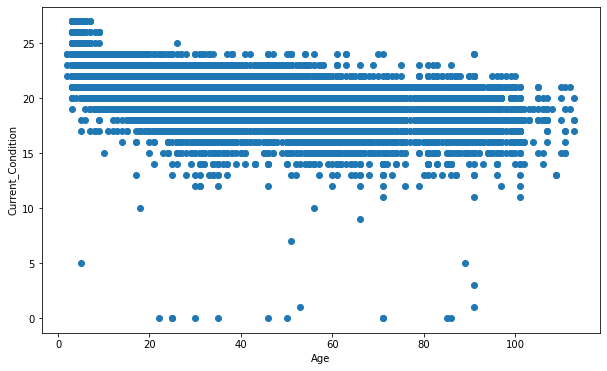

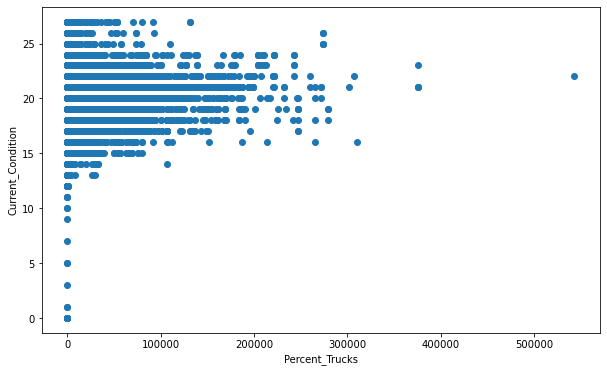

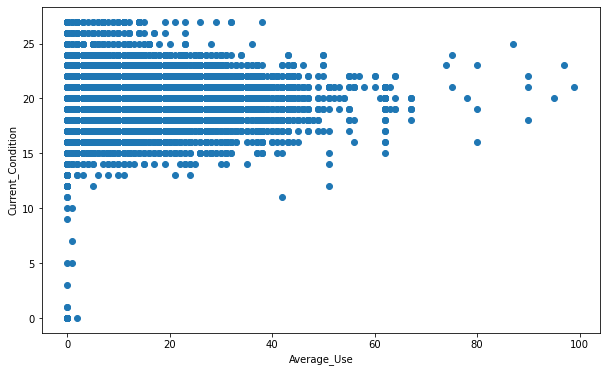

In [11]:
# Plotting a scatter plot for age and current condition
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.scatter(x=new_bridges['Age'], y=new_bridges['Current_Condition'])
ax1.set_xlabel('Age')
ax1.set_ylabel('Current_Condition')
plt.show()

# Plotting a scatter plot for percent trucks and current condition
fig, ax2 = plt.subplots(figsize=(10,6))
ax2.scatter(x=new_bridges['Percent_Trucks'], y=new_bridges['Current_Condition'])
ax2.set_xlabel('Percent_Trucks')
ax2.set_ylabel('Current_Condition')
plt.show()

# Plotting a scatter plot for average use and current condition
fig, ax3 = plt.subplots(figsize=(10,6))
ax3.scatter(x=new_bridges['Average_Use'], y=new_bridges['Current_Condition'])
ax3.set_xlabel('Average_Use')
ax3.set_ylabel('Current_Condition')
plt.show()

We have already filtered out the outliers (old bridges) so this makes the data more accurate. From the initial scatter plots we can visually not see any clear correlation bewteen all of age, trucks percent, average use and current condition of bridges. The regression later on will reveal if a relationship actually exists and how strong it is. We would expect to see the higher the trucks_percent the lower the current condition and also the higher age with a lower condition. The correlation coefficient may reveal more about these relationships with actual figures below.

##### Correlation coefficient and heat maps to show relationship between the continuous predictors 

The predictors may be correlated which would cause problems for our analysis as one of the conditions is to have independent predictors. Not being independent is an indicator of co linearity and violated the rules of regression. We will use correlation coefficient to check for this where a value closer to -1 is a strong negative and closer to 1 a strong positive. However, this does not give the whole picture as to whther the predictos correlate with the target variable. This is because even if we have low corrleation coefficients, there is still the possible issue of the value being close to zero and not being independent. This correlation coefficient is best taken as a check for a relationship between the predictors than an accurate measure of predictor signficiance on the target variable. However we can draw some primary conclusions from this data.

,Average_Use,Percent_Trucks,Age,Current_Condition
Average_Use,1.000000,0.023253,0.217100,-0.044704
Percent_Trucks,0.023253,1.000000,-0.057244,0.037680
Age,0.217100,-0.057244,1.000000,-0.593511
Current_Condition,-0.044704,0.037680,-0.593511,1.000000


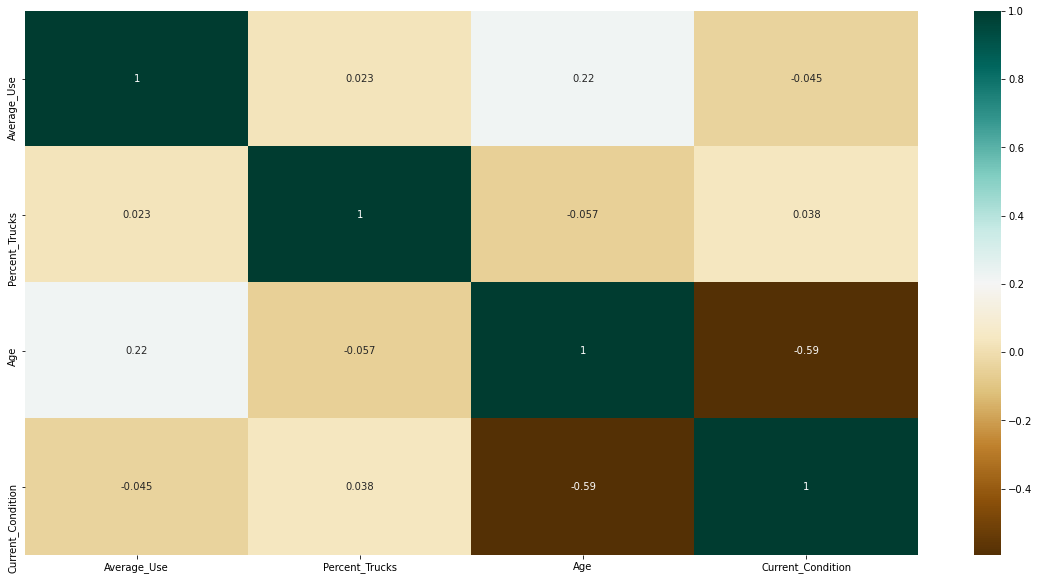

In [12]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
corr_coefficient = new_bridges.corr()
sns.heatmap(corr_coefficient,cmap='BrBG',annot=True)
corr_coefficient

The Heat map is the best method to identify the relationship between the continuous attributes. Heat maps are a method used to display and visualise the correlation coefficients more clearly and allow you to digest the figures easier. The key on the right hand side represents the correlation scale from -1 to 1 based on color. Age seems to have a strong negative correlation coefficient with current condition of -0.59. This means that as age goes up, current condition goes down which we suspected. Average use and percent trucks however seem to have no such correlation and seem to have no relationship with each other either. Average use and age have a very weak positive correlation of 0.22. These results we have to be cautious with as we can not be sure if the variables are independent or not and this could affect results. These initial results are positive signs for the predictors being independent with little to no correlation between each other, however this doesnt always mean independence but independent variables usually have low coefficients.

### Section 3.2: Categorical Variables Relationships

##### Cross tab to show the relationship between categorical variables 

In [13]:
#Material given design
mat_given_des = pd.crosstab(new_bridges.Design, [new_bridges.Material], normalize='index',margins=True)

mat_given_des.round(4) * 100

Material,Concrete,Other,Steel
Design,,,
Beam,76.64,1.64,21.72
Other,66.87,3.85,29.27
Slab,100.00,0.00,0.00
All,79.14,1.53,19.33


Material,Concrete,Other,Steel,All
Design,,,,
Beam,0.633382,0.013540,0.179516,0.826437
Other,0.031398,0.001809,0.013744,0.046951
Slab,0.126612,0.000000,0.000000,0.126612
All,0.791392,0.015349,0.193259,1.000000


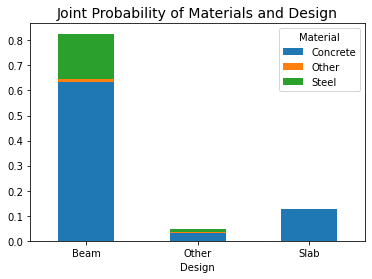

In [14]:
#Material and design relationship
mat_and_des = pd.crosstab(new_bridges.Design, [new_bridges.Material], normalize='all', margins=False)
mat_and_des.round(4) * 100

mat_and_des1 = pd.crosstab(new_bridges.Design, [new_bridges.Material], normalize='all', margins=True)
mat_and_des1.round(4) * 100

ax = mat_and_des.plot(kind='bar', subplots=False, rot=0, stacked=True)
ax.set_title('Joint Probability of Materials and Design', fontsize=14)

mat_and_des1

The first cross tab of material given design shows us that the majority of bridges in Texas are made from concrete. 
76.64 percent of bridges in Texas are concrete given they are beam design. 66.87 percent of bridges are concrete given they are an Other design and 100 percent of bridges are concrete given they are Slab design. However this also shows the data is heavily skewed in favour of concrete bridges so this doesn't give us much insight other than this.

The second crosstab shows us the joint probability of material and design. This table is a little more insightful as it gives us a more precise picture of both the material and the design are most common in texas bridges. The first insight we can take from this is Beam design bridges are the most common design accounting for 82.64% of all bridges.  We can also see from the bar chart and table that concrete beam bridges are by far the most common type accounting for 63.34 percent of all the bridges. Steel beam bridges account for 17.95% of all bridges and we expect to see later in the analysis that these are likely to be the newer bridges. If this is the case the new build bridges should be more likely to have a better current condition.

Using further inspection we can have a picture as to whether concrete or steel is the best material for bridges. If this is the case then current condition should on average should be higher for concrete than steel or other. 

We can get an insight into what material, bridges are made with based on there age. This could follow on from current condition and bring some important insights into what is the best material to use.

### Section 3.3: Continuous and Categorical Relationships

##### Boxplot to show the relationship between current condition vs categorical predictors 

<AxesSubplot:title={'center':'Current_Condition'}, xlabel='Design'>

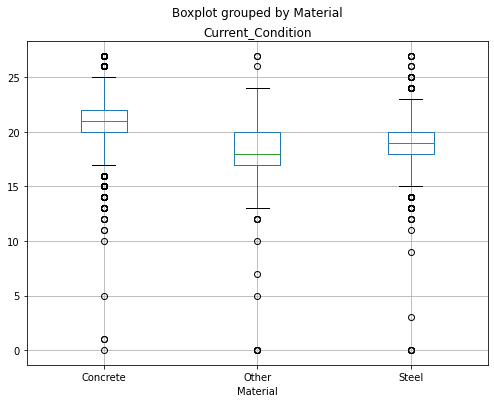

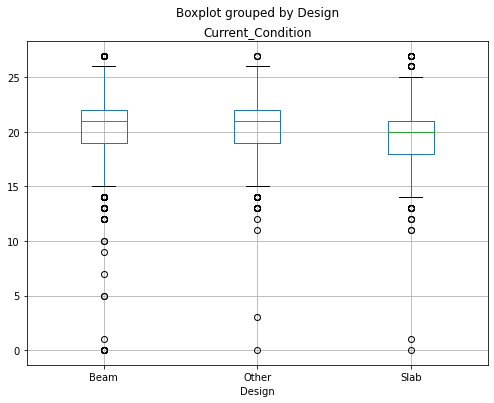

In [15]:
#Compare current condition score with the amount of occurences of a particular material or design.

new_bridges.boxplot(column='Current_Condition', by='Material', figsize=(8,6))
new_bridges.boxplot(column='Current_Condition', by='Design', figsize=(8,6))

For material and design the boxplots allow us to see how the distribution of values are spread throughout the current condition rating. It seems that for all 3 of the Designs, they have a relatively high rating with the median for all 3 categories 20 or above. However we can see that Beam and Other have a higher median than slab with both roughly at 22. This implies Beam and Other are better designs for the Texas Bridges although Slab scores decently high on average.

For material and current condition, we can see clearly that concrete is the best material for the texas bridges. It has a distinct advantage in current condition score over the others with a 22 median compared to the other at 17 and steel at 19. On the other hand Beam does seem to have more outliers than the other categories with very low scores. But as the data is skewed towards beam being the large majority of all bridges, it doesn't seem an issue that the most outliers lie in this category just because of probability.

##### Boxplot to show relationship for Age vs categorical predictors 

<AxesSubplot:title={'center':'Age'}, xlabel='Design'>

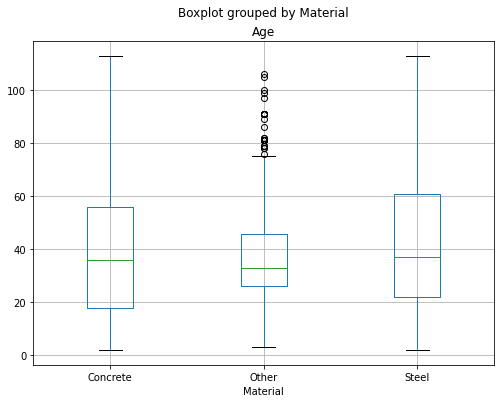

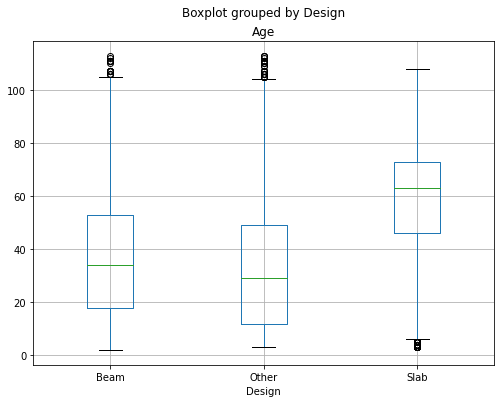

In [16]:
#Compare Age with the amount of occurences of a particular material or design.

new_bridges.boxplot(column='Age', by='Material', figsize=(8,6))
new_bridges.boxplot(column='Age', by='Design', figsize=(8,6))

The boxplots show that steel has more of its data over 60 than the other two categories. Concrete seems to have more younger bridges than steel and also other. This probably explains why it has the best current condition ratings.

Beam bridges seem to be varied but tend more towards the younger side for bridges compared to slab which seems to contain most of the 70 and over bridges. This could explain why slab has the lowest current condition of the 3 categories. Bridge technology has advanced and it seems the Beam concrete is the most popular for a reason as the data backs up its use. The boxplots reveal that newer materials are being trialled as other design has the lowest ages of the 3.

### Section 3.4: Preliminary conclusions

How well the proposed variables can predict the bridge condition.
Which of the proposed variables has more influence on the current condition.

From this initial analysis we can draw some preliminary conclusions to your questions. We will do further thorough analysis in the next section but from what we already know we will update you here. What we have gathered so far is that the proposed variables are not all great at predicting the bridge condition, however this is subject to change. Material and Design seem to be accurate predictors of bridge condition as the boxplot distributions show clear differences, for example slab which seems to contain most of the 70 and over bridges as well as more bridges than the other designs with the lowest current condition. This hints at slab being a hinderence to Texas bridges but the shift away from slab seems to be clear too. We need to be careful here as the categorical variables don't give us any actual correlation figures with the target variable just yet. As age decreases we see more concrete and steel bridges being built which seems to be correlating with higher current condition scores.

The correlation coeffcient of age and current condition are the only clear relationship and influence between continuous variables. a strong negative of -0.59 seems to show that as age goes down, bridge current condition score increases. This points towards the newer bridges being higher quality and most of the newer bridges are concrete which suggests this may be a good material to use. Average use and percent trucks don't seem to have much influence on the target variable but this may change. The predictors don't seem to impact each other either with largely small correlation coefficients, but a small chance at average use and age having a trend but unlikely.

So to summarise the primary conclusions we have come to is that beam concrete is by far the most common type of bridge and for good reason. The results show that only some of the predictors such as Age may have influence on current condition and there's a small chance the predictors are not independent which would affect validity of the analysis. With these results we have to be cautious as there are plenty of issues with coming to a conclusion so fast. The next section will give you concrete evidence to your questions.

## Section 4: Regression Modelling


### Section 4.1: Preparation

##### Checking if the target variable is normally distributed 

The best regression line minimises the square error assuming the dependent variable has a normal distribution. We can see from the graph below that current condition, has a slight ... skew which is reasonabke enough to say has a normal dsitrbution.

array([[<AxesSubplot:title={'center':'Current_Condition'}>]], dtype=object)

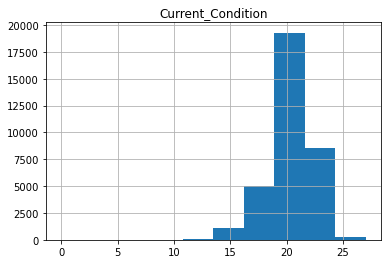

In [17]:
new_bridges.hist(column='Current_Condition')

##### Checking for co-linearity

The predictors should not be colinear and we have proven this by the scatter graph and corrleation coefficient.

<AxesSubplot:xlabel='Average_Use', ylabel='Percent_Trucks'>

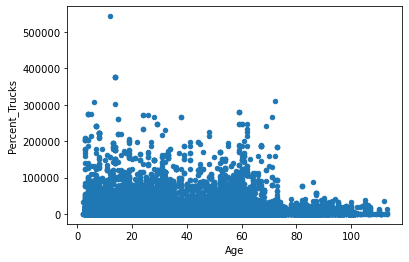

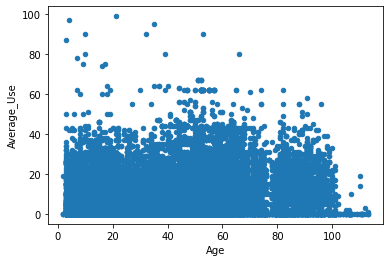

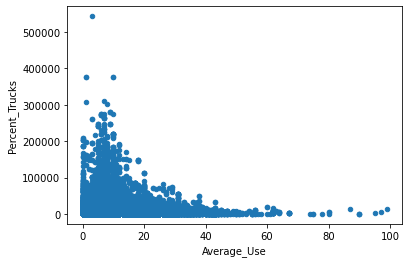

In [18]:
new_bridges.plot(kind='scatter',  x='Age', y='Percent_Trucks')
new_bridges.plot(kind='scatter',  x='Age', y='Average_Use')
new_bridges.plot(kind='scatter',  x='Average_Use', y='Percent_Trucks')


##### Converting the categorical predictors

In [19]:
Material_dummy = pd.get_dummies(new_bridges.Material, drop_first=True)
Material_dummy

,Other,Steel
Structure_id,,
000021521-00101,0,0
000021521-00181,0,0
000021521-TMP20,0,0
000021525-00012,1,0
000021580-00092,0,0
...,...,...
DAPFORHOO000012,0,0
DAPFORHOO000013,0,0
DAPFORHOO000015,0,0


In [20]:
Design_dummy = pd.get_dummies(new_bridges.Design, drop_first=True)
Design_dummy

,Other,Slab
Structure_id,,
000021521-00101,0,1
000021521-00181,0,1
000021521-TMP20,0,0
000021525-00012,0,0
000021580-00092,0,0
...,...,...
DAPFORHOO000012,0,0
DAPFORHOO000013,0,0
DAPFORHOO000015,0,0


##### Creating the final Dataframe with the predictors and target variable

In [21]:
regression_df = pd.DataFrame()

regression_df = regression_df.assign(Material_dummy_other = Material_dummy.Other)
regression_df = regression_df.assign(Material_dummy_steel= Material_dummy.Steel)
regression_df = regression_df.assign(Design_dummy_other = Design_dummy.Other)
regression_df = regression_df.assign(Design_dummy_slab = Design_dummy.Slab)
regression_df = regression_df.assign(Average_Use = new_bridges.loc[:,'Average_Use'])
regression_df = regression_df.assign(Percent_Trucks = new_bridges.loc[:,'Percent_Trucks'])
regression_df = regression_df.assign(Age = new_bridges.loc[:,'Age'])
regression_df = regression_df.assign(Current_Condition = new_bridges.loc[:,'Current_Condition'])

regression_df

,Material_dummy_other,Material_dummy_steel,Design_dummy_other,Design_dummy_slab,Average_Use,Percent_Trucks,Age,Current_Condition
Structure_id,,,,,,,,
000021521-00101,0,0,0,1,0.0,1,16,23
000021521-00181,0,0,0,1,0.0,1,16,22
000021521-TMP20,0,0,0,0,0.0,100,9,24
000021525-00012,1,0,0,0,0.0,80,71,18
000021580-00092,0,0,0,0,4.0,150,17,23
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,0,0,0,0,40.0,300,27,21
DAPFORHOO000013,0,0,0,0,40.0,300,21,21
DAPFORHOO000015,0,0,0,0,25.0,1200,25,21


### Section 4.1: Fitting the regression line

In [22]:
y = new_bridges.Current_Condition # this is the target variable

X = np.column_stack((Material_dummy.Other,Material_dummy.Steel,Design_dummy.Other,Design_dummy.Slab, new_bridges.Average_Use,
                     new_bridges.Percent_Trucks,new_bridges.Age)) #Design matrix

reg = LinearRegression().fit(X, y)
print('The R^2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
print('The regression coefficients are:', reg.coef_)


The R^2 coefficient of determination is 0.451
The intercept is 22.5
The regression coefficients are: [-2.78883680e+00 -1.37744966e+00  1.40239492e-01 -7.58967573e-02
  5.15163119e-03 -6.56576675e-07 -4.84860748e-02]


### Section 4.2: The R^2 (coefficient of determination) 
  
The R^2 is the coefficient of determination. This statistic measures how well the data fits the regression model, in other words the goodness of fit. The higher the R^2 the better the model is. R^2 determines the proportion of variance in the dependent variable that can be explained by the independent variable. The R^2 is therefore a quality metric of the model however we can not rely on just this to measure the models quality. 

In the regression we ran to compare the current condition with our independent variables, we have discovered an R^2 of 0.451. The model only explains around 43% of the variation which is quite low.This shows the model fits the data but it could be a lot better. In some cases there is a requirement of a 0.6 R^2 or above for the model to be considered a good fit so this model falls just short. 0.451 is still a reasonable value and is still considered fairly correlated. Any R^2 less than 0.4 is considered bad. This R^2 is low enough to be considered the line isn't a good fit.

In [23]:
print('The R^2 coefficient of determination is %4.3f' % reg.score(X, y))

The R^2 coefficient of determination is 0.451


### Section 4.3: Displaying the distribution of residuals (errors).  

Root of the mean squared error: 1.48


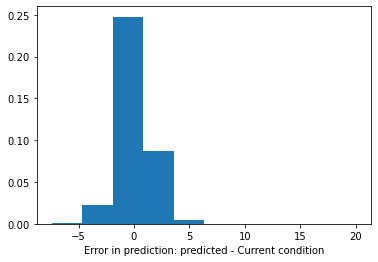

In [24]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - Current condition')

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

Text(0, 0.5, 'Actual Value')

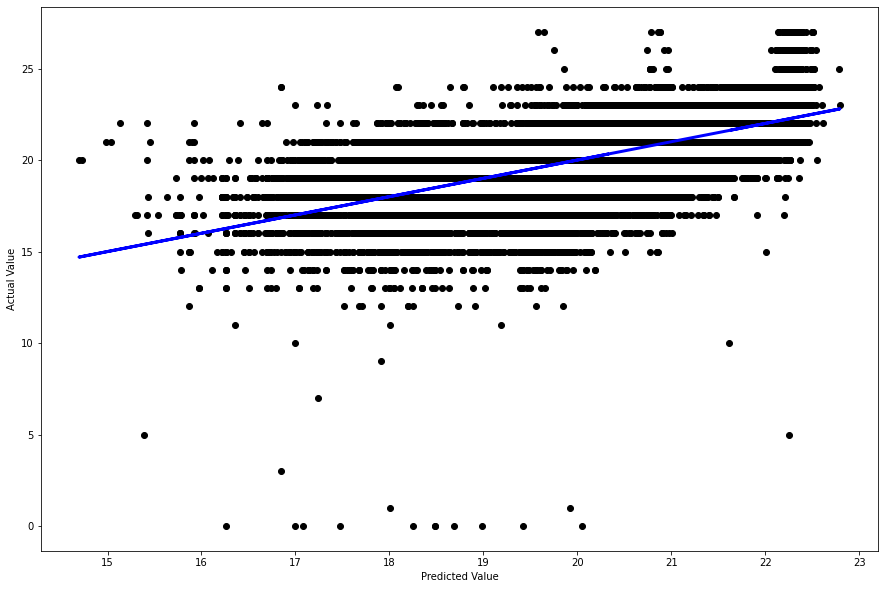

In [25]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

Root Mean Square Error is a standard way to measure the error of a model in predicting data. This will allow us to get an accurate measure of how good our model is as a means of bridge condition prediction. A lower RMSE means the model has less error and is more reliable with a better fit to the trend line which is our goal. RMSE is a good measure to use if we want to estimate the standard deviation of a typical observed value from our model’s prediction. The variation are model has from the actual values essentially. 

The distribution of error residuals seems to be normally distributed from the histogram above. It also has most of it's errors close to zero which is a good sign. This means the error is not so large and the model is a good predictor for the data set. The distribution of residual errors graph shows and backs this up visually as most of the data points of are close to the regression line. This means the error between predicted and actual values is small. This is backed up by the very small root of mean squared error value of 1.48.

### Section 4.4: Comparing the influence of the predictors on the Current condition  

In [26]:
average_use_range = new_bridges.Average_Use.quantile(0.9) - new_bridges.Average_Use.quantile(0.1)
percent_trucks_range = new_bridges.Percent_Trucks.quantile(0.9) - new_bridges.Percent_Trucks.quantile(0.1)
age_range = new_bridges.Age.quantile(0.9) - new_bridges.Age.quantile(0.1)
condition_range = new_bridges.Current_Condition.quantile(0.9) - new_bridges.Current_Condition.quantile(0.1)

beta_Material_Other = reg.coef_[0]
beta_Material_Steel = reg.coef_[1]
beta_Design_Other = reg.coef_[2]
beta_Design_Slab = reg.coef_[3]
beta_Average_Use = reg.coef_[4]
beta_Percent_Trucks = reg.coef_[5]
beta_Age = reg.coef_[6]

# print('Average use range (10th to 90th centile) is %3.1f' % average_use_range, 'vehicles')
# print('percent trucks range (10th to 90th centile) is %3.1f' % percent_trucks_range, 'percent')
# print('Age range (10th to 90th centile) is %3.1f' % age_range, 'years')
# print('condition range (10th to 90th centile) is %3.1f' % condition_range, 'score')

print ('The change in current condition (as a percent of its range) given by the average use coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Average_Use * average_use_range) / condition_range))

print ('The change in current condition (as a percent of its range) given by the percent trucks coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Percent_Trucks  * percent_trucks_range) / condition_range))

print ('The change in current condition (as a percent of its range) given by the age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age * age_range) / condition_range))


print ('The change in current condition (as a percent of its range) given by the material.other coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Material_Other * age_range) / condition_range))

print ('The change in current condition (as a percent of its range) given by the material.steel coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Material_Steel * age_range) / condition_range))

print ('The change in current condition (as a percent of its range) given by the design.other coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Design_Other * age_range) / condition_range))

print ('The change in current condition (as a percent of its range) given by the design.slab coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Design_Slab * age_range) / condition_range))




The change in current condition (as a percent of its range) given by the average use coefficient (over its range) is  2.4 percent
The change in current condition (as a percent of its range) given by the percent trucks coefficient (over its range) is -0.4 percent
The change in current condition (as a percent of its range) given by the age coefficient (over its range) is -59.2 percent
The change in current condition (as a percent of its range) given by the material.other coefficient (over its range) is -3402.4 percent
The change in current condition (as a percent of its range) given by the material.steel coefficient (over its range) is -1680.5 percent
The change in current condition (as a percent of its range) given by the design.other coefficient (over its range) is 171.1 percent
The change in current condition (as a percent of its range) given by the design.slab coefficient (over its range) is -92.6 percent


As the units are different, we need to take care when we compare the predictors. We cannot accurately compare the age of the bridge with the percentage of trucks. As the two are incomparable we need a method to compare influences on the target variable. We can make a comparison based on the distributions of the two variables, which you can see the values for above. We could not simply use the regression coefficients to effectively compare the influence of the predictors on the target variable so we used a further step. The method of calculate the change in the target values as a percentage of its range that would result from the changing each of the predictor variables over its range. This gives a better comparison of the importance of the predictors.

Using this method we can see clearly the most important predictor for the continuous variables is the age. This aligns with our preliminary conclusions with a value of -59.2 percent for the change in current condition given by the age coefficient which is significant. On the other hand as we first thought, percent trucks and average use have very little to no impact on current bridge condition with values of 2.4 and -0.4 respectively. This means many of the predictor variables weren't so important and most likely contributed to a lower R^2. Age is the only predictor we really needed and it shows a negative corellation, as age goes down current condition goes up.

The range method for the categorical variables must be compared seperately. We can see that material.other has a bigger negative effect on current condition than material.steel. For design, design.other has a larger positive impact and design.slab has a larger negative impact on current condition.

### Section 4.5: Conclusions

From the analysis we have carried out, we can conclusively say that the best predictor for bridge condition is the Age. The material and design variables have a relationship with the current condition also. From the continuous variables, age is the only effectve predictor for the current condition of texas bridges it seems with a -59.2 percent for the change in current condition which shows this is very influential in determining bridge condition. 

From our regression analysis and comparing the distributions of our predictor variables we can see that percent trucks and average use have little to no effect on our target variable and are weak predictors of texas bridge conditions. We have come to the conclusion that as age goes down the quality and condition of the bridge score goes up. We have also come to realise which aligns with our preliminary conclusions, that the material and design of the bridge is very important in determining current condition. The Texas bridge being made of slab or concrete makes a huge difference to the current condition score.Slab bridges for example tend to be older and in worser condition and this also correlates with age. This shows material and design are very good predictors of the current bridge condition. The variables distributions back my hypothesis up that material and design changes will have a big impact on the condition with relatively high values for the change in bridge condition by there respective coefficients.

In summary, I propose to you the representative of the Texas Department of Transportation, that you focus on the best materials and design possible such as concrete and beam to keep the bridges in the best condition possible due to the strong correlation. Concrete is cheaper than steel and also more durable so it is the best material to use. As you may already know, concrete beam bridges make up over 63 percent of the texas bridges which is a good sign for the years to come, which will allow the bridges to be in better condition for longer. I would have thought the number of vehicles going over the bridges had a larger impact on the condition but the results show otherwise so this is not an issue. Age is the best predictor of bridge condition so it seems the materials and designs for the newer build bridges is the most optimal and effective. Having a few more significant predictors would have been good to get further insight into the proposed questions and it may have even made the age effect decrease due to the other co efficients having higher weights of correlation. This is something to think about as there could be a variable that we missed which has an even greater impact than age.

For further analysis I  recommend we have more variables present. This will give us more accurate predictions and could also possibly give a better fit to the data as the current R^2 could be a lot better. We would also get more accurate predictions on what causes the current condition of the bridge. Only one strong continuous predictor will not paint the whole picture, however it has a significant impact and gives a deep insight into the Texas bridges situation.